<a href="https://colab.research.google.com/github/Sanarazaaa/Biostatistics/blob/main/Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normal Distribution

Definition: In a normal distribution, data is symmetrically distributed with no skew. When plotted on a graph, the data follows a bell shape, with most values clustering around a central region and tapering off as they go further away from the center.

Properties of it includes the following:

* Normal Distribution Curve is symmetric about mean.
* Normal Distribution is unimodal in nature, i.e., it has single peak value.
* Normal Distribution Curve is always bell-shaped.
* Mean, Mode, and Median for Normal Distribution is always same.
* Normal Distribution follows Empirical Rule.

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Upload file manually

# Read CSV file (modify filename accordingly)
df = pd.read_csv(next(iter(uploaded)))

# Display first few rows
df.head()

Saving Cell_Observations.csv to Cell_Observations.csv


,ID,Experiment_ID,X_position_of_cell,Y_position_of_cell,Timestamp,Cell_size
0,1,5,52.08,18.83,2023-06-15 22:45:25,7.92
1,2,2,86.91,51.58,2024-08-18 09:00:12,8.61
2,3,5,90.95,51.13,2023-06-29 03:38:42,7.00
3,4,10,12.69,12.69,2023-12-28 17:51:12,2.25
4,5,7,6.57,38.46,2024-02-15 05:11:00,3.41


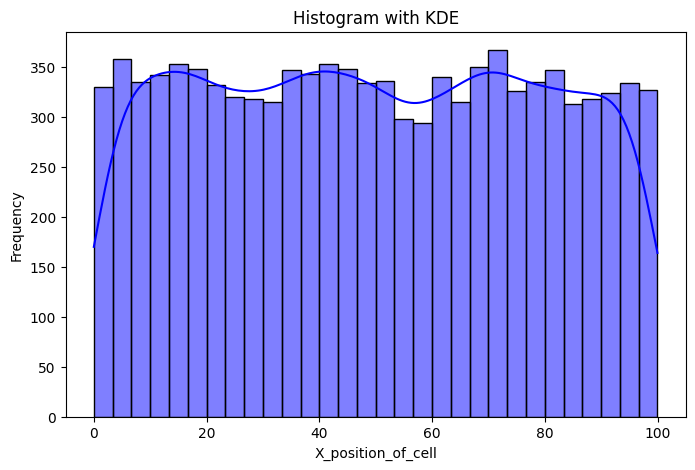

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a numerical column to analyze
column = "X_position_of_cell"

plt.figure(figsize=(8,5))
sns.histplot(df[column], bins=30, kde=True, color='blue')  # KDE (Kernel Density Estimate) for smooth curve
plt.title('Histogram with KDE')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


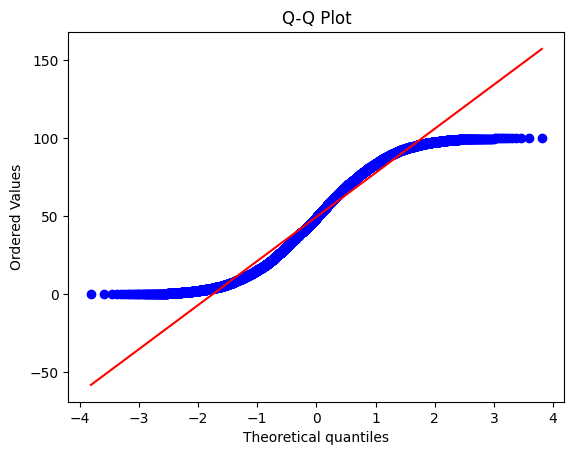

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot to check normality
stats.probplot(df[column], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [6]:
from scipy.stats import shapiro

stat, p = shapiro(df[column])
print(f'Shapiro-Wilk Test Statistic={stat}, p-value={p}')

if p > 0.05:
    print("Data is likely normally distributed (Fail to reject H0)")
else:
    print("Data is likely NOT normally distributed (Reject H0)")


Shapiro-Wilk Test Statistic=0.9543071294706424, p-value=3.9735081303801465e-48
Data is likely NOT normally distributed (Reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


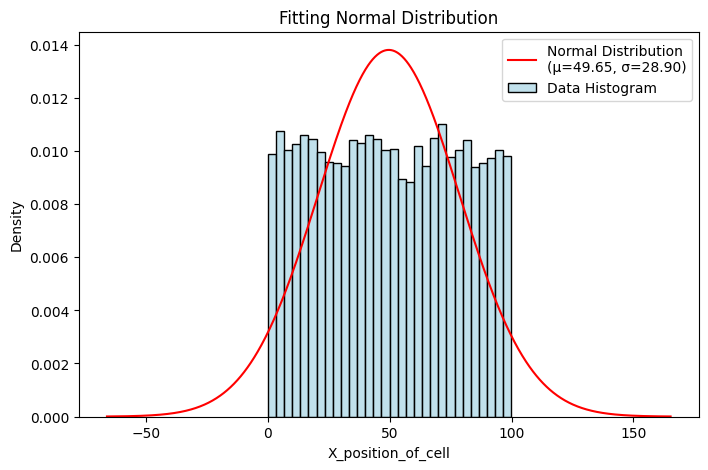

In [8]:
import numpy as np
from scipy.stats import norm

mu, sigma = df[column].mean(), df[column].std()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8,5))
sns.histplot(df[column], bins=30, kde=False, stat="density", color='lightblue', label='Data Histogram')
plt.plot(x, pdf, 'r', label=f'Normal Distribution\n(μ={mu:.2f}, σ={sigma:.2f})')
plt.legend()
plt.title('Fitting Normal Distribution')
plt.xlabel(column)
plt.ylabel('Density')
plt.show()


**If your histogram + KDE plot looks like a bell curve, the data might be normally distributed.

If the Q-Q plot shows points near a straight line, it supports normality.

If Shapiro-Wilk & Kolmogorov-Smirnov tests return p > 0.05, data follows normal distribution.

If fitted normal curve aligns well with the histogram, the assumption is valid.**